## Evaluate the current status of the nanocosms

all data are imported and summarized then a panel with all trajectories is created.

In [2]:
import os; os.chdir("..")  # change into root of working directory
import sys; sys.path.append("src")  # add src to system path and allow packages to be found
import pandas as pd
import itertools as it
import numpy as np
from matplotlib import pyplot as plt
import evaluation.calc as calc
from image.analysis import Data

In [43]:
data = Data.combine_data_classic(
    datapath="data/",
    interpolation_cfg={"method":"pad", "limit":1, "limit_direction":"forward"})
data.fillna(0, inplace=True)

The next steps boil the data down

In [44]:
# get count of organisms for each picture and each analysis
groups = ["id","picture", "species", "analysis","culex_larvae",
          "culex_adults", "culex_pupae", "culex_repro", "sediment"]
d = calc.aggregate(
    data, 
    aggregations={"hash":"size", "value":"mean"}, 
    names=["count", "mean_size"],
    freq="S", groups=groups)

# get sum of analyses for each picture and species
groups = [g for g in groups if g != "analysis"] # remove picture from group list
d = calc.aggregate(
    d, {"count":"sum", "mean_size": "mean"}, names=[],
    freq="S", groups=groups )

# get sum of analyses for each picture and species
groups = [g for g in groups if g != "picture"] # remove picture from group list
d = calc.aggregate(
    d, {"count":"max", "mean_size": "mean"}, names=["count"],
    freq="D", groups=groups )

d

count  \
time       id species culex_larvae culex_adults culex_pupae culex_repro sediment          
2021-04-02 1  Culex   0.0          0.0          0.0         0.0         0.0           4   
              Daphnia 0.0          0.0          0.0         0.0         0.0          31   
           2  Culex   0.0          0.0          0.0         0.0         0.0           8   
              Daphnia 0.0          0.0          0.0         0.0         0.0          17   
           3  Culex   0.0          0.0          0.0         0.0         0.0          11   
...                                                                                 ...   
2021-04-16 78 Daphnia 9.0          2.0          0.0         0.0         1.0          26   
           79 Culex   3.0          1.0          1.0         0.0         1.0           3   
              Daphnia 3.0          1.0          1.0         0.0         1.0           7   
           80 Culex   16.0         0.0          0.0         0.0         1.0           9   
              Daphnia 16.0         0.0          0.0         0.0         1.0          38   

                                                                                  mean_size  
time       id species culex_larvae culex_adults culex_pupae culex_repro sediment             
2021-04-02 1  Culex   0.0          0.0          0.0         0.0         0.0        4.833333  
              Daphnia 0.0          0.0          0.0         0.0         0.0       21.353747  
           2  Culex   0.0          0.0          0.0         0.0         0.0        4.023810  
              Daphnia 0.0          0.0          0.0         0.0         0.0       39.101062  
           3  Culex   0.0          0.0          0.0         0.0         0.0        5.133333  
...                                                                                     ...  
2021-04-16 78 Daphnia 9.0          2.0          0.0         0.0         1.0       34.895469  
           79 Culex   3.0          1.0          1.0         0.0         1.0        4.083333  
              Daphnia 3.0          1.0          1.0         0.0         1.0       20.392857  
           80 Culex   16.0         0.0          0.0         0.0         1.0        3.875000  
              Daphnia 16.0         0.0          0.0         0.0         1.0       64.850706  

[800 rows x 2 columns]

plot panels with trajectories of culex. Dates, where larvae counts of the image detection are exchanged with manual larvae counts have to be manually specified.

(0.0, 200.0)

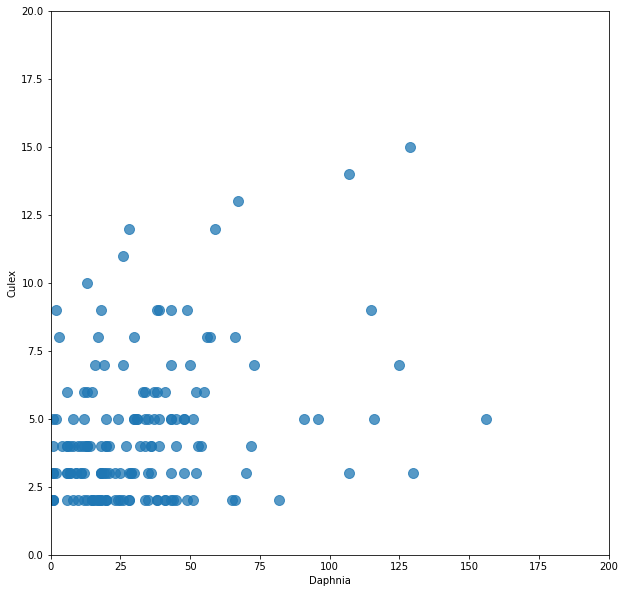

In [55]:
data = d.reset_index()[["time", "species", "count","id"]].rename(columns={"count":"y"}).query("time == '2021-04-09' | time == '2021-04-16'")
species = np.array(data.species)
daphnia = np.array(data.y)[species=="Daphnia"]
culex = np.array(data.y)[species=="Culex"]
g = np.where(np.array(data.id)[species=="Culex"] <= 40, 0, 1)
# o2 = np.array(data.oxygen)
# print(daphnia)
# print(culex)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(daphnia, culex, c="tab:blue", alpha=.75, s=100)
ax.set_xlabel("Daphnia")
ax.set_ylabel("Culex")
ax.set_ylim(0,20)
ax.set_xlim(0,200)